<a href="https://colab.research.google.com/github/CaroBrambila/Actividad1/blob/main/M1_Actividad_1_(Correlaci%C3%B3n).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#INSTALAR LIBRERIAS
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install openpyxl

In [3]:
#Importamos librerías requeridas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Convertir en dataframe
df= pd.read_csv("diamonds.csv")
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,NaN,58.0,2757.0,6.15,6.12,3.74


In [6]:
#Verificamos información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53937 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53938 non-null  float64
 5   table    53937 non-null  float64
 6   price    53937 non-null  float64
 7   x        53939 non-null  float64
 8   y        53939 non-null  float64
 9   z        53936 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.1+ MB


In [7]:
#Imprimo los primeros 5 registro del dataframe
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [9]:
#Filtro por comparacion
filtro1=df[df["price"] > 5000]
filtro1

,carat,cut,color,clarity,depth,table,price,x,y,z
11416,1.16,Ideal,E,SI2,62.7,56.0,5001.0,6.69,6.73,4.21
11417,1.16,Ideal,E,SI2,59.9,57.0,5001.0,6.80,6.82,4.08
11418,0.90,Good,G,VVS2,63.6,58.0,5001.0,6.10,6.11,3.88
11419,0.90,Very Good,E,VS1,62.3,56.0,5001.0,6.10,6.19,3.83
11420,0.90,Premium,D,VS2,62.6,59.0,5001.0,6.14,6.17,3.85
...,...,...,...,...,...,...,...,...,...,...
27745,2.00,Very Good,H,SI1,62.8,57.0,18803.0,7.95,8.00,5.01
27746,2.07,Ideal,G,SI2,62.5,55.0,18804.0,8.20,8.13,5.11
27747,1.51,Ideal,G,IF,61.7,55.0,18806.0,7.37,7.41,4.56
27748,2.00,Very Good,G,SI1,63.5,56.0,18818.0,7.90,7.97,5.04


In [10]:
#Identificar valores nulos por columna
valores_nulos=df.isnull().sum()
valores_nulos

,0
carat,3
cut,0
color,0
clarity,0
depth,2
table,3
price,3
x,1
y,1
z,4


In [12]:
#Identificar valores nulos por dataframe
valores_nulos=df.isnull().sum().sum()
valores_nulos

17

SUSTITUCIÓN DE LOS VALORES NULOS

In [13]:
#Realizamos una copia del dataframe
data=df.copy()

In [16]:
data["carat"]=data["carat"].fillna(round(df["carat"].mean(),1))
data["price"]=data["price"].fillna(round(df["price"].mean(),1))

In [17]:
#Sustituir valores nulos por valores no nulos hacia adelante  "forward fill" ("ffill")
#Filtro por columnas
data["depth"] =data["depth"].fillna(method="ffill")
data["table"] =data["table"].fillna(method="ffill")

<ipython-input-17-3c4d52b1aaf4>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["depth"] =data["depth"].fillna(method="ffill")
<ipython-input-17-3c4d52b1aaf4>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["table"] =data["table"].fillna(method="ffill")


In [19]:
#Identificar valores nulos por columna
valores_nulos=data.isnull().sum()
valores_nulos

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,1
y,1
z,4


In [20]:
# Ajustar maximo de filas
pd.options.display.max_rows = None
# Ajustar maximo de columnas
pd.options.display.max_columns = None

In [21]:
#Reemplazamos valores nulos del dataframe con "bfill"
data =df.fillna(method="ffill")

<ipython-input-21-5fa7e59a48ea>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data =df.fillna(method="ffill")


<Figure size 1500x800 with 0 Axes>

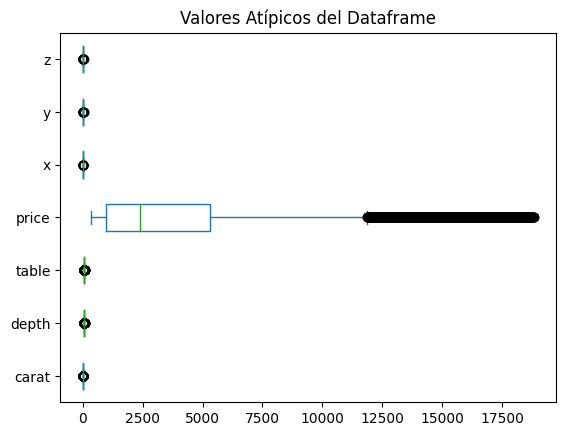

In [22]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
data.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [30]:
#Método aplicando desviación estandar. Encuentro los valores extremos
# Suponiendo que 'df' es el DataFrame y queremos aplicar el método a la columna 'price'
y = data['price']  # Cambia 'price' por la columna que te interesa

# Método aplicando desviación estándar
Limite_Superior = y.mean() + 3 * y.std()
Limite_Inferior = y.mean() - 3 * y.std()

print("Límite superior permitido:", Limite_Superior)
print("Límite inferior permitido:", Limite_Inferior)

# Filtrar los datos que están dentro de los límites
df_filtrado = df[(y >= Limite_Inferior) & (y <= Limite_Superior)]

print("Datos filtrados con outliers removidos:")
print(df_filtrado)


Se han truncado las últimas 5000 líneas del flujo de salida.
48940   3.14  
48941   3.45  
48942   3.61  
48943   3.68  
48944   3.33  
48945   3.21  
48946   3.30  
48947   3.89  
48948   3.52  
48949   3.52  
48950   3.27  
48951   3.30  
48952   3.65  
48953   3.39  
48954   3.54  
48955   3.52  
48956   3.56  
48957   3.56  
48958   3.51  
48959   3.36  
48960   2.84  
48961   2.82  
48962   2.76  
48963   2.70  
48964   2.81  
48965   2.77  
48966   2.80  
48967   2.80  
48968   2.78  
48969   2.75  
48970   2.86  
48971   2.80  
48972   2.80  
48973   2.79  
48974   2.80  
48975   2.82  
48976   2.81  
48977   2.76  
48978   2.83  
48979   2.78  
48980   2.76  
48981   2.77  
48982   2.48  
48983   2.48  
48984   2.91  
48985   2.44  
48986   2.86  
48987   2.84  
48988   2.83  
48989   2.86  
48990   3.56  
48991   3.53  
48992   3.57  
48993   3.64  
48994   3.60  
48995   3.84  
48996   3.51  
48997   3.33  
48998   3.69  
48999   3.50  
49000   3.66  
49001   3.45  
49002   3

In [28]:
#Encontramos Ouliers del Dataframe
outliers= data[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,carat,cut,color,clarity,depth,table,price,x,y,z
26394,2.19,Very Good,I,SI2,60.3,60.0,15907.0,8.29,8.33,5.01
26395,2.01,Premium,H,VS2,61.1,61.0,15908.0,8.14,8.09,4.96
26396,2.14,Premium,I,SI1,61.3,61.0,15913.0,8.32,8.28,5.09
26397,2.14,Premium,I,SI2,60.1,58.0,15915.0,8.41,8.37,5.04
26398,2.01,Premium,H,SI2,62.3,58.0,15917.0,8.11,8.06,5.04
26399,2.39,Premium,H,SI1,61.8,58.0,15917.0,8.57,8.52,5.28
26400,2.01,Premium,H,SI2,63.0,59.0,15917.0,7.93,7.90,4.99
26401,2.01,Very Good,I,VS2,62.1,60.0,15919.0,7.96,8.01,4.96
26402,2.01,Very Good,I,VS2,59.6,62.0,15919.0,8.17,8.25,4.89
26403,2.01,Good,H,SI1,63.2,58.0,15919.0,7.93,7.98,5.03


In [29]:
y = df['price']  # Cambia 'price' por la columna que te interesa

# Método aplicando cuartiles
percentile25 = y.quantile(0.25)  # Primer cuartil (Q1)
percentile75 = y.quantile(0.75)  # Tercer cuartil (Q3)
iqr = percentile75 - percentile25  # Rango intercuartílico (IQR)

# Definir los límites superior e inferior
Limite_Superior_iqr = percentile75 + 1.5 * iqr
Limite_Inferior_iqr = percentile25 - 1.5 * iqr

print("Límite superior permitido:", Limite_Superior_iqr)
print("Límite inferior permitido:", Limite_Inferior_iqr)

# Filtrar los outliers
outliers = df[(y > Limite_Superior_iqr) | (y < Limite_Inferior_iqr)]
print("Outliers encontrados:")
print(outliers)

# Sustituyendo los outliers con los límites
df['price'] = df['price'].apply(lambda x: Limite_Superior_iqr if x > Limite_Superior_iqr else Limite_Inferior_iqr if x < Limite_Inferior_iqr else x)

print("DataFrame con outliers sustituidos:")
print(df)


Se han truncado las últimas 5000 líneas del flujo de salida.
48940   3.14  
48941   3.45  
48942   3.61  
48943   3.68  
48944   3.33  
48945   3.21  
48946   3.30  
48947   3.89  
48948   3.52  
48949   3.52  
48950   3.27  
48951   3.30  
48952   3.65  
48953   3.39  
48954   3.54  
48955   3.52  
48956   3.56  
48957   3.56  
48958   3.51  
48959   3.36  
48960   2.84  
48961   2.82  
48962   2.76  
48963   2.70  
48964   2.81  
48965   2.77  
48966   2.80  
48967   2.80  
48968   2.78  
48969   2.75  
48970   2.86  
48971   2.80  
48972   2.80  
48973   2.79  
48974   2.80  
48975   2.82  
48976   2.81  
48977   2.76  
48978   2.83  
48979   2.78  
48980   2.76  
48981   2.77  
48982   2.48  
48983   2.48  
48984   2.91  
48985   2.44  
48986   2.86  
48987   2.84  
48988   2.83  
48989   2.86  
48990   3.56  
48991   3.53  
48992   3.57  
48993   3.64  
48994   3.60  
48995   3.84  
48996   3.51  
48997   3.33  
48998   3.69  
48999   3.50  
49000   3.66  
49001   3.45  
49002   3

CORRELACIONES

In [32]:
correlacion_carat_price = data['carat'].corr(data['price'])
print(f"La correlación entre 'carat' y 'price' es: {correlacion_carat_price}")

La correlación entre 'carat' y 'price' es: 0.9215839356962143


La correlación entre 'carat' y 'price' es: 0.9215839356962143
La correlación entre 'depth' y 'price' es: -0.010656100054687145


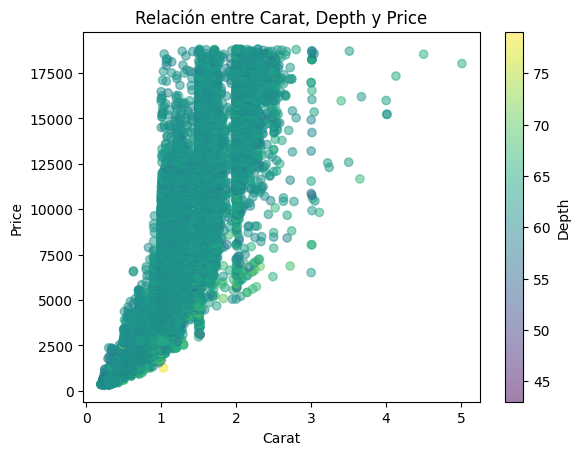

In [35]:
# Calcular la correlación entre 'carat' y 'price', y entre 'depth' y 'price'
correlacion_carat_price = data['carat'].corr(data['price'])
correlacion_depth_price = data['depth'].corr(data['price'])

print(f"La correlación entre 'carat' y 'price' es: {correlacion_carat_price}")
print(f"La correlación entre 'depth' y 'price' es: {correlacion_depth_price}")


import matplotlib.pyplot as plt

# Gráfico de dispersión de carat vs price, coloreado por depth
plt.scatter(data['carat'], data['price'], c=data['depth'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Depth')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Relación entre Carat, Depth y Price')
plt.show()


Correlación Carat vs Price: 0.9215839356962143
Correlación Depth vs Price: -0.010656100054687145
Correlación Table vs Price: 0.12714021164564743
Correlación Carat y Depth vs Price:
 carat    0.921584
depth   -0.010656
dtype: float64
Correlación Carat y Table vs Price:
 carat    0.921584
table    0.127140
dtype: float64
Correlación Depth y Table vs Price:
 depth   -0.010656
table    0.127140
dtype: float64
Correlación tamaño (x, y, z) vs Price:
 x    0.884436
y    0.865421
z    0.861248
dtype: float64
Correlación tamaño, carat y depth vs Price:
 x        0.884436
y        0.865421
z        0.861248
carat    0.921584
depth   -0.010656
dtype: float64
Correlación tamaño, carat, depth y table vs Price:
 x        0.884436
y        0.865421
z        0.861248
carat    0.921584
depth   -0.010656
table    0.127140
dtype: float64


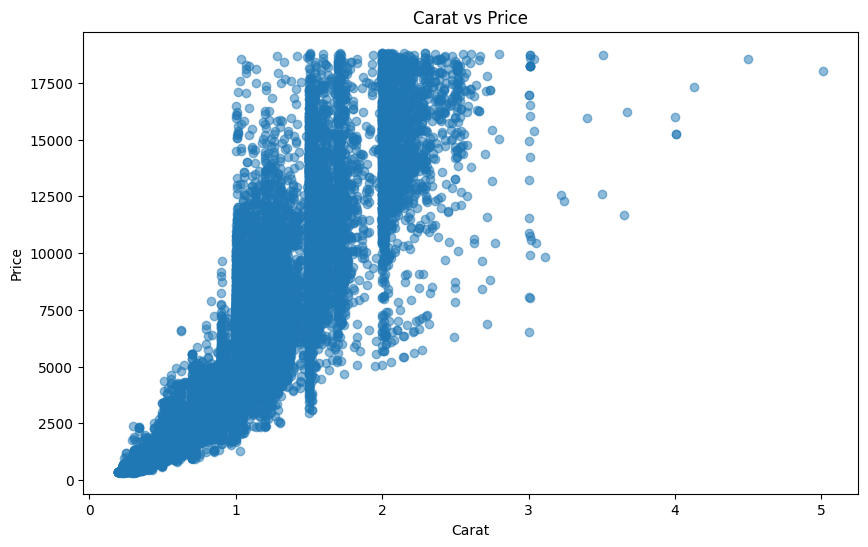

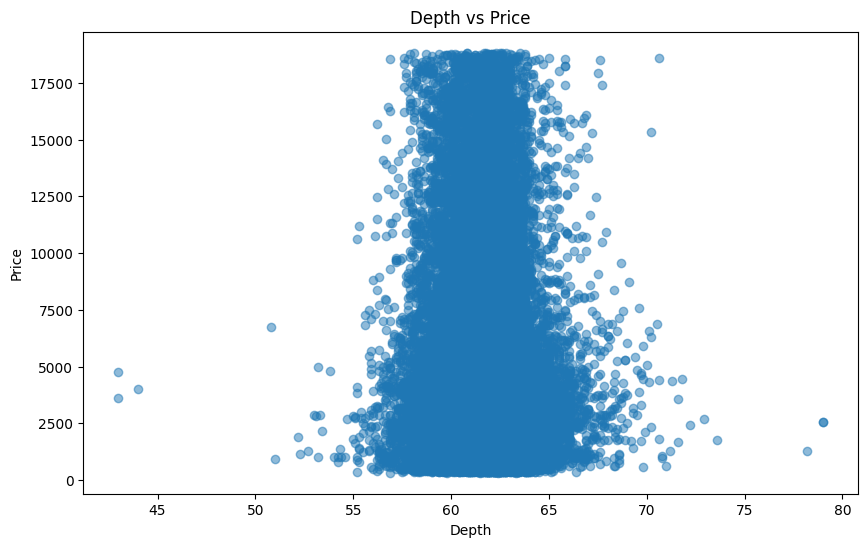

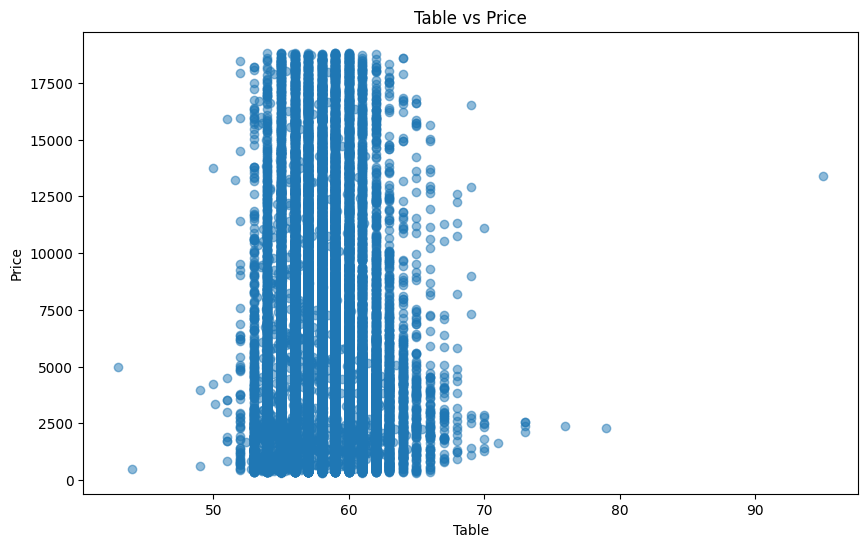

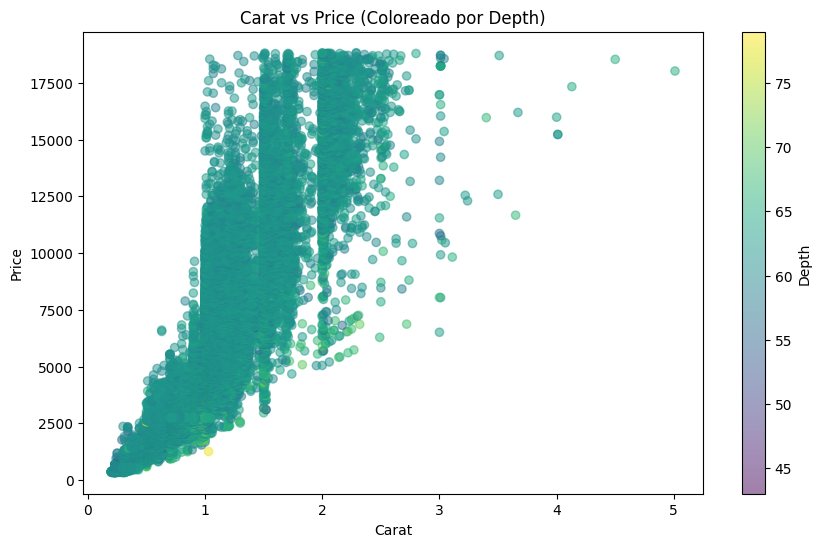

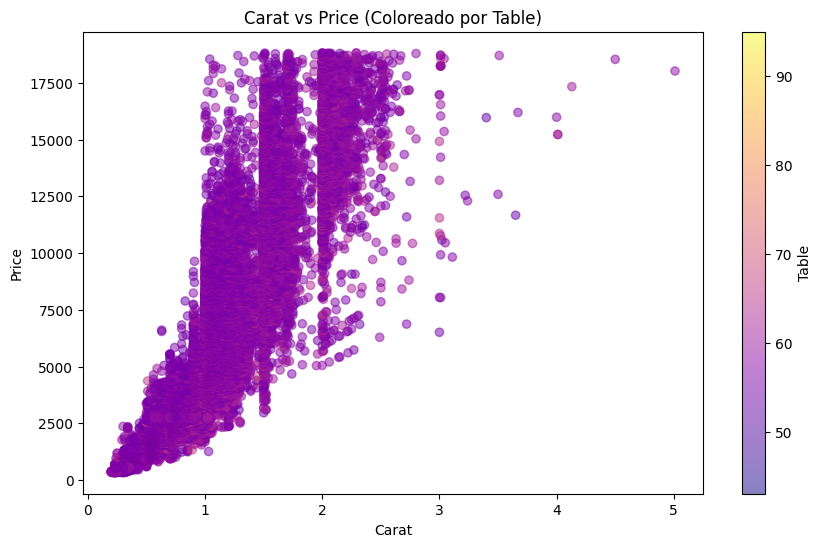

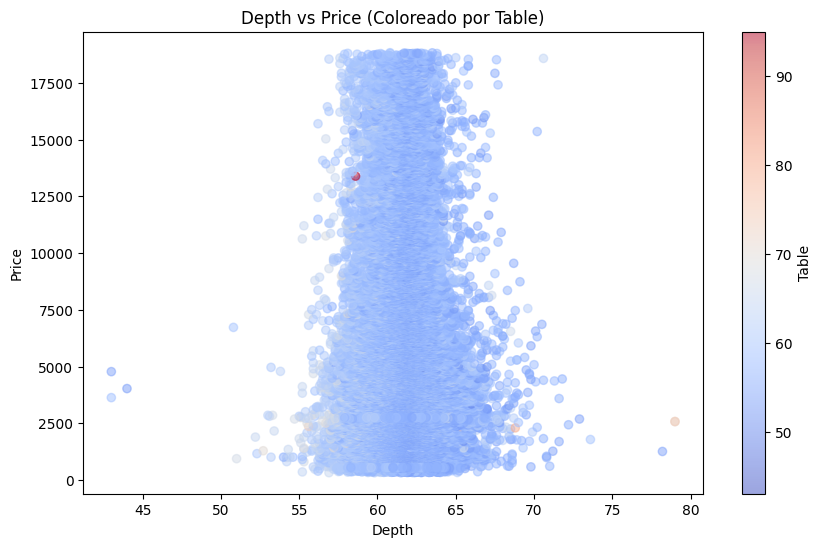

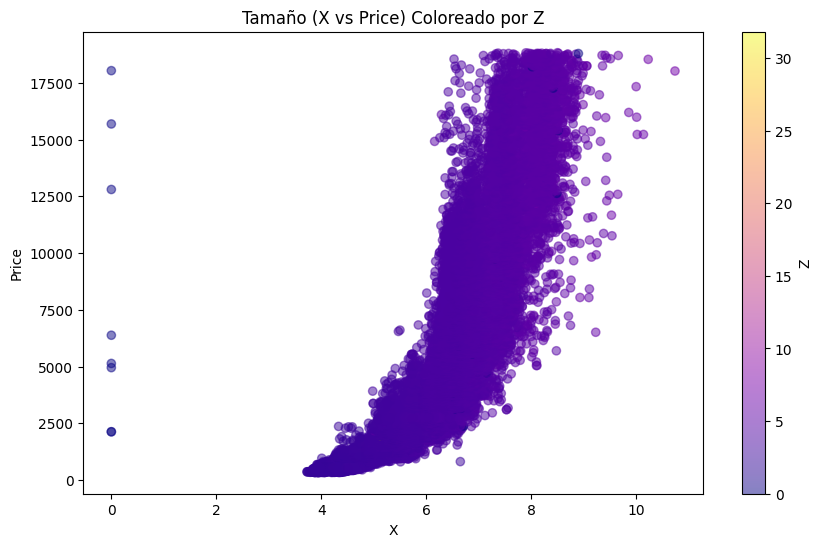

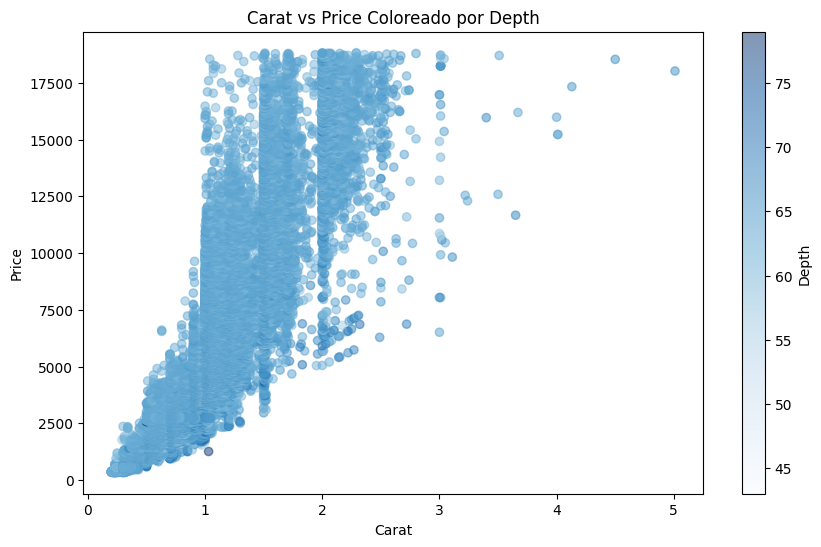

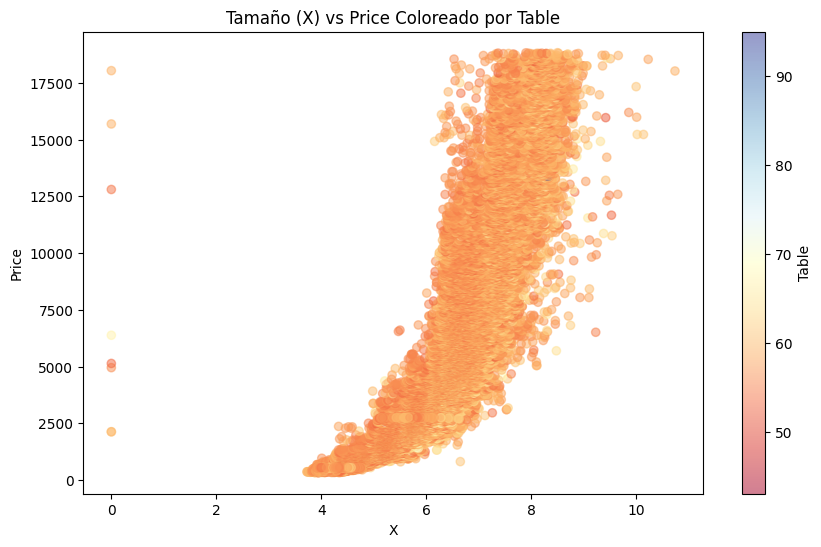

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que ya tienes el DataFrame 'data' cargado

# a) Correlación Carat vs Price
correlacion_carat_price = data['carat'].corr(data['price'])

# b) Correlación Depth vs Price
correlacion_depth_price = data['depth'].corr(data['price'])

# c) Correlación Table vs Price
correlacion_table_price = data['table'].corr(data['price'])

# d) Correlación Carat y Depth vs Price
correlacion_carat_depth_price = data[['carat', 'depth']].corrwith(data['price'])

# e) Correlación Carat y Table vs Price
correlacion_carat_table_price = data[['carat', 'table']].corrwith(data['price'])

# f) Correlación Depth y Table vs Price
correlacion_depth_table_price = data[['depth', 'table']].corrwith(data['price'])

# g) Correlación tamaño (x, y, z) vs Price
correlacion_tamano_price = data[['x', 'y', 'z']].corrwith(data['price'])

# h) Correlación tamaño, carat y depth vs Price
correlacion_tamano_carat_depth_price = data[['x', 'y', 'z', 'carat', 'depth']].corrwith(data['price'])

# i) Correlación tamaño, carat, depth y table vs Price
correlacion_completa_price = data[['x', 'y', 'z', 'carat', 'depth', 'table']].corrwith(data['price'])

# Imprimir las correlaciones
print("Correlación Carat vs Price:", correlacion_carat_price)
print("Correlación Depth vs Price:", correlacion_depth_price)
print("Correlación Table vs Price:", correlacion_table_price)
print("Correlación Carat y Depth vs Price:\n", correlacion_carat_depth_price)
print("Correlación Carat y Table vs Price:\n", correlacion_carat_table_price)
print("Correlación Depth y Table vs Price:\n", correlacion_depth_table_price)
print("Correlación tamaño (x, y, z) vs Price:\n", correlacion_tamano_price)
print("Correlación tamaño, carat y depth vs Price:\n", correlacion_tamano_carat_depth_price)
print("Correlación tamaño, carat, depth y table vs Price:\n", correlacion_completa_price)

# Graficar los diagramas de dispersión

# a) Scatter plot Carat vs Price
plt.figure(figsize=(10, 6))
plt.scatter(data['carat'], data['price'], alpha=0.5)
plt.title('Carat vs Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

# b) Scatter plot Depth vs Price
plt.figure(figsize=(10, 6))
plt.scatter(data['depth'], data['price'], alpha=0.5)
plt.title('Depth vs Price')
plt.xlabel('Depth')
plt.ylabel('Price')
plt.show()

# c) Scatter plot Table vs Price
plt.figure(figsize=(10, 6))
plt.scatter(data['table'], data['price'], alpha=0.5)
plt.title('Table vs Price')
plt.xlabel('Table')
plt.ylabel('Price')
plt.show()

# d) Scatter plot Carat and Depth vs Price (usando colores)
plt.figure(figsize=(10, 6))
plt.scatter(data['carat'], data['price'], c=data['depth'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Depth')
plt.title('Carat vs Price (Coloreado por Depth)')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

# e) Scatter plot Carat and Table vs Price (usando colores)
plt.figure(figsize=(10, 6))
plt.scatter(data['carat'], data['price'], c=data['table'], cmap='plasma', alpha=0.5)
plt.colorbar(label='Table')
plt.title('Carat vs Price (Coloreado por Table)')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

# f) Scatter plot Depth and Table vs Price (usando colores)
plt.figure(figsize=(10, 6))
plt.scatter(data['depth'], data['price'], c=data['table'], cmap='coolwarm', alpha=0.5)
plt.colorbar(label='Table')
plt.title('Depth vs Price (Coloreado por Table)')
plt.xlabel('Depth')
plt.ylabel('Price')
plt.show()

# g) Scatter plot Tamaño (X, Y, Z) vs Price (3D visualización en 2D con X)
plt.figure(figsize=(10, 6))
plt.scatter(data['x'], data['price'], c=data['z'], cmap='plasma', alpha=0.5)
plt.colorbar(label='Z')
plt.title('Tamaño (X vs Price) Coloreado por Z')
plt.xlabel('X')
plt.ylabel('Price')
plt.show()

# h) Scatter plot Tamaño, Carat, y Depth vs Price (colores para Depth)
plt.figure(figsize=(10, 6))
plt.scatter(data['carat'], data['price'], c=data['depth'], cmap='Blues', alpha=0.5)
plt.colorbar(label='Depth')
plt.title('Carat vs Price Coloreado por Depth')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

# i) Scatter plot Tamaño, Carat, Depth y Table vs Price (combinación final)
plt.figure(figsize=(10, 6))
plt.scatter(data['x'], data['price'], c=data['table'], cmap='RdYlBu', alpha=0.5)
plt.colorbar(label='Table')
plt.title('Tamaño (X) vs Price Coloreado por Table')
plt.xlabel('X')
plt.ylabel('Price')
plt.show()


In [38]:
import pandas as pd

# Calcular las correlaciones
correlaciones = {
    'Variable(s)': [
        'Carat', 'Depth', 'Table',
        'Carat & Depth', 'Carat & Table',
        'Depth & Table', 'Tamaño (x, y, z)',
        'Tamaño, Carat & Depth', 'Tamaño, Carat, Depth & Table'
    ],
    'Coeficiente de Correlación': [
        data['carat'].corr(data['price']),
        data['depth'].corr(data['price']),
        data['table'].corr(data['price']),
        data[['carat', 'depth']].corrwith(data['price']).mean(),
        data[['carat', 'table']].corrwith(data['price']).mean(),
        data[['depth', 'table']].corrwith(data['price']).mean(),
        data[['x', 'y', 'z']].corrwith(data['price']).mean(),
        data[['x', 'y', 'z', 'carat', 'depth']].corrwith(data['price']).mean(),
        data[['x', 'y', 'z', 'carat', 'depth', 'table']].corrwith(data['price']).mean()
    ]
}

# Crear la tabla
tabla_comparativa = pd.DataFrame(correlaciones)

# Mostrar la tabla
print(tabla_comparativa)


                    Variable(s)  Coeficiente de Correlación
0                         Carat                    0.921584
1                         Depth                   -0.010656
2                         Table                    0.127140
3                 Carat & Depth                    0.455464
4                 Carat & Table                    0.524362
5                 Depth & Table                    0.058242
6              Tamaño (x, y, z)                    0.870368
7         Tamaño, Carat & Depth                    0.704407
8  Tamaño, Carat, Depth & Table                    0.608195
